We invetigate about the globules in M1-67 and we find some papers for [M1-67 and WR 124](https://github.com/will-henney/globule-seminario/issues/19#issuecomment-1517063395).
In our discussion we take some values for the wind velocity $v_\inf$,  mass-loss rate $\dot{M}$, distance $d$, ionizing luminosity $L_*$.
We [obtain](https://github.com/will-henney/globule-seminario/issues/20) the angular size of the globules (radius).
We found that en this case the electronic density are between $n_e\approx500 cm^{-3}$ at the exterior and $n_e\approx 2000cm^{-3}$ and we compare this with an stimate similarly to LDN 1616

In [1]:
# for Packages
import numpy as np
from IPython.display import display, Markdown #this is for the text in our code
from astropy.coordinates import SkyCoord #import astropy 
import astropy.units as u #import the units
from astropy.coordinates import SkyCoord #coordinates from astropy
from astropy import constants as const #constants

In [2]:
import matplotlib.pyplot as plt

rc_fonts = {
        "text.usetex": True,
        "font.size": 30,
        'mathtext.default': 'regular',
        'axes.titlesize': 33,
        "axes.labelsize": 33,
        "legend.fontsize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        'figure.titlesize': 33,
        'figure.figsize': (13,11),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }

plt.rcParams.update(rc_fonts)

/home/roberto/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
#Parameters
D = 5429*u.pc
v_inf = 710*u.km*(1/u.second)
M_loss = (2.0E-5)*u.M_sun*(1/u.yr)
L = 10**(49.1)*(1/u.second)

In [4]:
L

<Quantity 1.25892541e+49 1 / s>

For the radius globule we use the definition of $pc$ and we have that $0.1 arcsec \times D[pc]=r[UA]$, where $D$ is in $pc$ and $r$ in $UA$.
_scipy dont have UA so we convert to pc directly_

In [5]:
r = 542.9*(4.8481E-6)*u.pc  #globule radius in pc

For an stimate similar to LDN 1616 considering the wind velocity and ionizing flux we have
$$n_0=\frac{-u_0+\sqrt{u_0^2+4h\alpha_\beta F_0}}{2h\alpha_\beta}$$

For the luminosity we have $$L=\int_{4\pi}d\Omega\int_V j_\nu dV$$ and for $H_\alpha$ we have
$$L(H\alpha)=\int_{4\pi}d\Omega\int_V j dV=4\pi\int_V jdV$$ with $j$ our source therefore
$$L(H\alpha)=4\pi \int_V  \alpha_\beta n_e n_p(h\nu)_{H\alpha}f_{H \alpha} dV$$ where $f_{H\alpha}$ is a efficient factor, and because $\alpha_\beta,(h\nu)_{H\alpha},f_{H\alpha}$ are constant and assuming that $n_e=n_p$ and using the definition for VEM we have
$$L(H\alpha)=4\pi\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}VEM$$ on the other hand for the flux we have $L=4\pi r^2F$ so we have
$$4\pi D^2F(H\alpha)=4\pi\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}VEM$$
$$\Rightarrow VEM=\frac{D^2F(H\alpha)}{\alpha_\beta(h\nu)_{H\alpha}f_{H\alpha}}$$

Now for VEM we use the result that we obtain 
$$VEM=\pi\xi_0n_0^2r_0^3$$
$$\Rightarrow n_0=\sqrt{\frac{VEM}{\pi\xi_0 r_0^3}}$$

In [6]:
F_Ha = 3.0E-14*(u.erg/(u.cm**2*u.second))
E = (6.61E-27*2.99E10)/(6.563E-5)*(u.erg)
alpha_Halpha = 2.20E-13*(u.cm**3/u.second)    # with T=6 000K
VEM = (4*np.pi*(D.to('cm'))**2*F_Ha)/(alpha_Halpha*E)
VEM

<Quantity 1.59690459e+56 1 / cm3>

In [7]:
r = (542.9*u.AU) #globule radius 
xi = 0.2291820650049779
n_0 = ((VEM)/(np.pi*xi*(r.to('cm'))**3))**(1/2)
n_0

<Quantity 20347.27960482 1 / cm3>

We have a density similarly to Grosdidier $\approx 5739 cm^{-3}$, Now we want the ioniziong flux that we need

In [8]:
alpha_beta = 2.3E-13 * u.cm**3 / (u.second)
h = 0.1*r
F0 = n_0**2*alpha_beta*(h.to('cm'))+n_0*v_inf
F0

<Quantity 1.52199358e+12 1 / (cm2 s)>

Now we calculated the distance to which are localizated

In [9]:
L_lyman = 10**(49.1)*(1/u.second)
distance = (L/(4*np.pi*F0))**(1/2)
distance

<Quantity 8.11313416e+17 cm>

In [10]:
distance.to('pc')

<Quantity 0.26292877 pc>

$0.5 pc$ is the distance, and we considerer that globules are between 10" and 30".

In [11]:
distance1 = 10*5429*u.AU
distance1.to('pc')

<Quantity 0.26320535 pc>

In [12]:
distance2 = 30*5429*u.AU
distance2.to('pc')

<Quantity 0.78961604 pc>

The distance that we obtain is in the range of 10" and 30", $0.26 pc$ and $0.78pc$.

Now we calculated the pressure of the wind and we have

In [13]:
# for distance 1
P = (M_loss*v_inf)/(4*np.pi*(distance1.to('cm'))**2)
(P).cgs

<Quantity 1.07941865e-08 P / s>

For the velocity sound we calculated with a Temperature at 6000 K

In [14]:
T = 6000*u.K
m = (0.6*u.M_p).to('g')
c_s=((const.k_B).to('erg/K')*T/m)**(1/2)
c_s.to('km/second')

<Quantity 9.08537273 km / s>

Now we calculated the pressure of the globule

In [15]:
P_g = 2*n_0*m*c_s**2
P_g.to('P/s')

<Quantity 3.37109415e-08 P / s>

Finally we obtain a ratio of

In [16]:
(P).cgs/(P_g).cgs

<Quantity 0.32019831>

In [17]:
# for distance 2
P2 = (M_loss*v_inf)/(4*np.pi*(distance2.to('cm'))**2)
(P2).cgs

<Quantity 1.19935405e-09 P / s>

In [18]:
(P2).cgs/(P_g).cgs

<Quantity 0.03557759>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


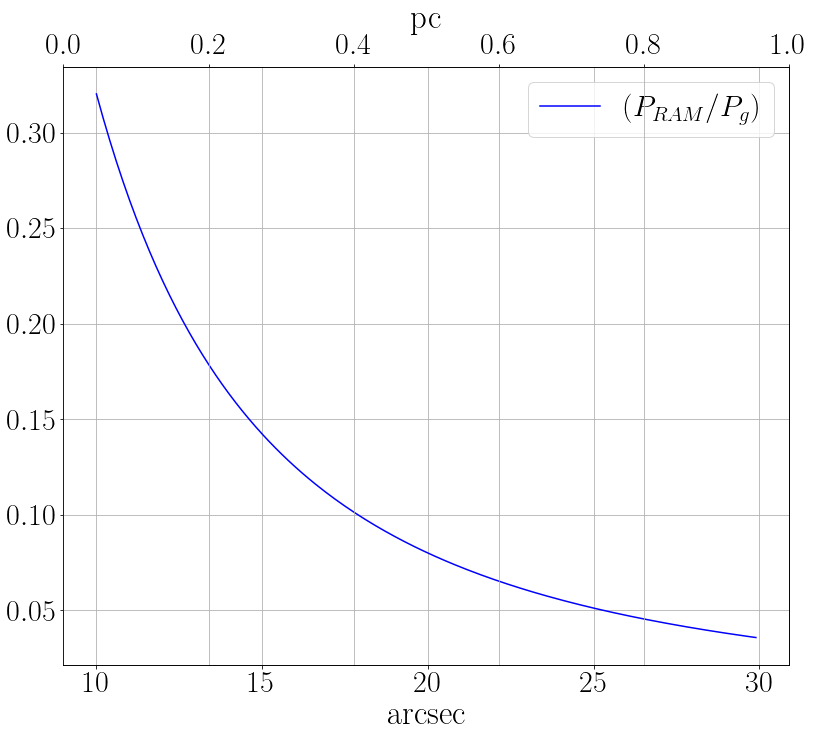

In [19]:
rang = np.arange(10,30,0.1)
distances = rang*5429*u.AU
P_r = (M_loss*v_inf)/(4*np.pi*(distances.to('cm'))**2)
Pr_P = (P_r).cgs/(P_g).cgs
inverse = 1/Pr_P

fig, axes = plt.subplots()
axes.plot(rang, Pr_P, 'b',label = r'$(P_{RAM}/P_{g})$')
#twin_axes.plot(distances.to('pc'), inverse, 'r', label = r'$(P_{g}/P_{RAM})$')
#twin_axes.set_xlabel('pc')
axes.set_xlabel('arcsec')
plt.grid()
plt.legend()
twin_axes = axes.twiny()
#twin_axes.plot(distances.to('pc'), inverse, 'r', label = r'$(P_{g}/P_{RAM})$')
twin_axes.set_xlabel('pc')
plt.grid()
#plt.legend()
plt.show()

In [20]:
10**(-4.2)*(0.1**(1/2))

1.9952623149688786e-05

In [21]:
L_bol= 10**(5.52)*u.L_sun
eta = M_loss*v_inf*(3.0E10)*(u.cm/u.second)/L_bol
(eta).cgs

<Quantity 2.11757896>

In [22]:
M_loss1=2.0E-5*(u.M_sun/u.yr)
eta1 = M_loss1*v_inf*(3.0E10)*(u.cm/u.second)/L_bol
(eta1).cgs

<Quantity 2.11757896>